In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import f1_score

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head()


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

<AxesSubplot:>

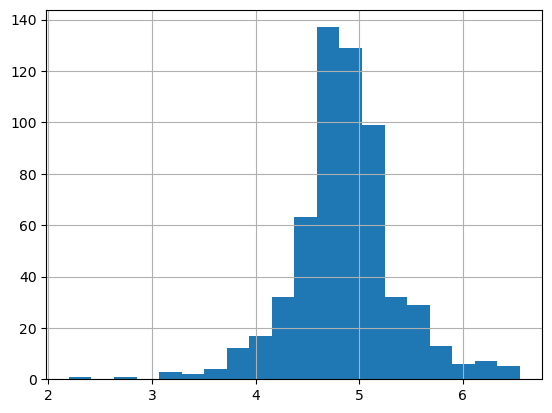

In [7]:
df['loanAmount_log']=np.log(df['loanamount'])
df['loanAmount_log'].hist(bins=20)

In [8]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
loanAmount_log       22
dtype: int64

<AxesSubplot:>

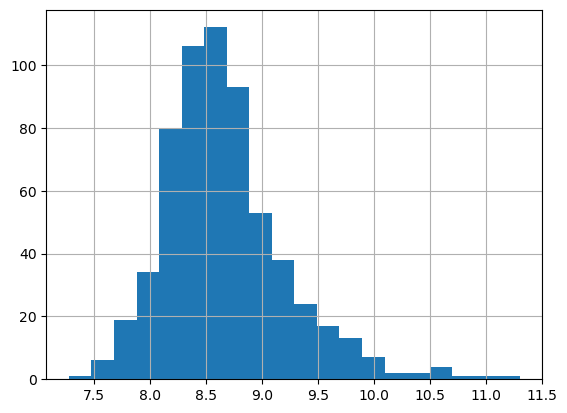

In [9]:
df['TotalIncome']=df['applicantincome']+ df['coapplicantincome']
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [10]:
df['gender'].fillna(df['gender'].mode()[0],inplace = True)
df['married'].fillna(df['married'].mode()[0],inplace = True)
df['self_employed'].fillna(df['self_employed'].mode()[0],inplace = True)
df['dependents'].fillna(df['dependents'].mode()[0],inplace = True)

df['loanamount'] = df['loanamount'].fillna(df['loanamount'].mean())
df['loanAmount_log']= df['loanAmount_log'].fillna(df['loanAmount_log'].mean())

df['loan_amount_term'].fillna(df['loan_amount_term'].mode()[0],inplace = True)
df['credit_history'].fillna(df['credit_history'].mode()[0],inplace = True)

df.isnull().sum()



loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [11]:
x= df.iloc[:,np.r_[1:5,9:11,13:15]].values
y=df.iloc[:,12].values


number of people who take loan as group by gender:
male      502
female    112
Name: gender, dtype: int64


<AxesSubplot:xlabel='gender', ylabel='count'>

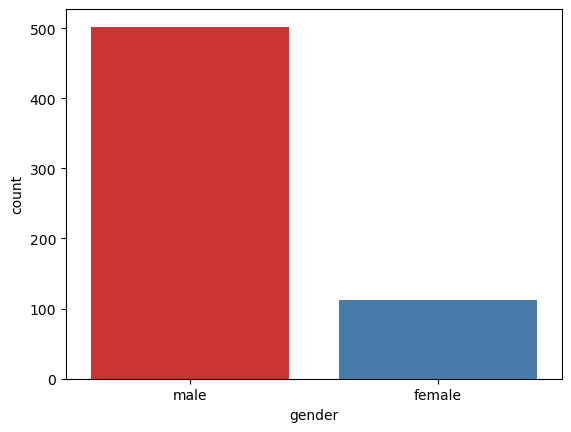

In [12]:
print("number of people who take loan as group by gender:")
print(df['gender'].value_counts())
sns.countplot(x= 'gender',data=df,palette = 'Set1')

number of people who take loan as group by marital status:
yes    401
no     213
Name: married, dtype: int64


<AxesSubplot:xlabel='married', ylabel='count'>

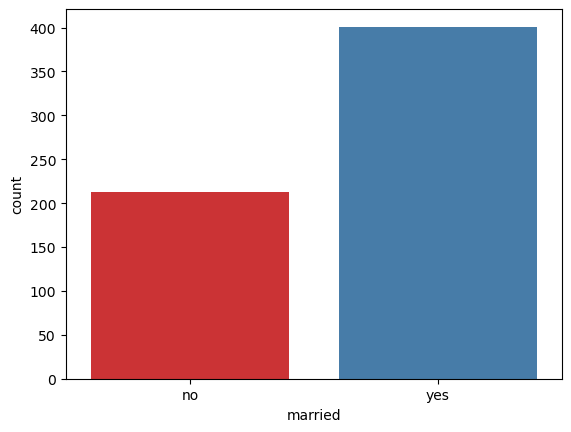

In [13]:
print("number of people who take loan as group by marital status:")
print(df['married'].value_counts())
sns.countplot(x= 'married',data=df,palette = 'Set1')

number of people who take loan as group by dependents:
0     360
1     102
2     101
3+     51
Name: dependents, dtype: int64


<AxesSubplot:xlabel='dependents', ylabel='count'>

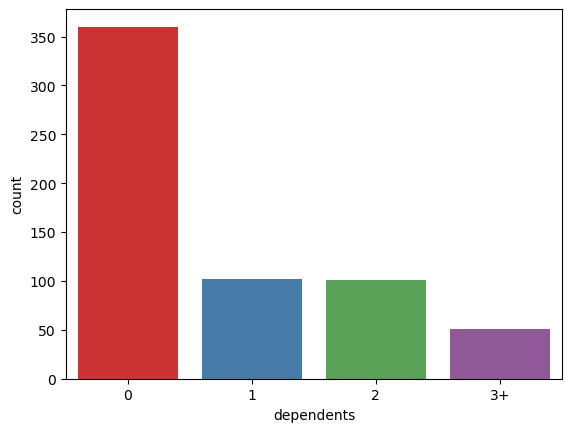

In [14]:
print("number of people who take loan as group by dependents:")
print(df['dependents'].value_counts())
sns.countplot(x= 'dependents',data=df,palette = 'Set1')

number of people who take loan as group by self employed:
no     532
yes     82
Name: self_employed, dtype: int64


<AxesSubplot:xlabel='self_employed', ylabel='count'>

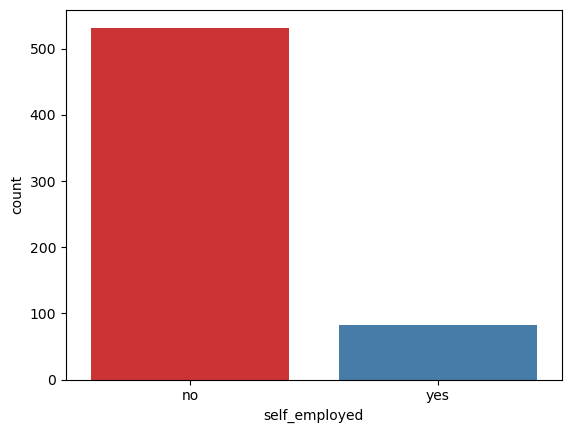

In [15]:
print("number of people who take loan as group by self employed:")
print(df['self_employed'].value_counts())
sns.countplot(x= 'self_employed',data=df,palette = 'Set1')

number of people who take loan as group by loan amount:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: loanamount, Length: 204, dtype: int64


<AxesSubplot:xlabel='loanamount', ylabel='count'>

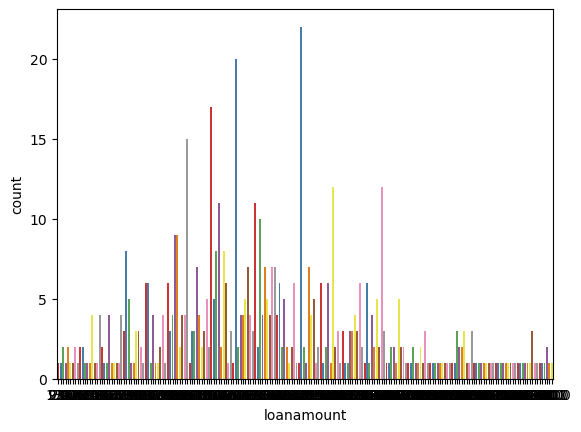

In [16]:
print("number of people who take loan as group by loan amount:")
print(df['loanamount'].value_counts())
sns.countplot(x= 'loanamount',data=df,palette = 'Set1')

number of people who take loan as group by credit history:
1.0    525
0.0     89
Name: credit_history, dtype: int64


<AxesSubplot:xlabel='credit_history', ylabel='count'>

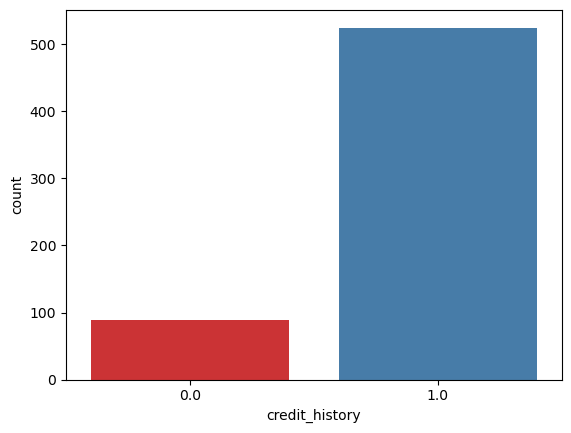

In [17]:
print("number of people who take loan as group by credit history:")
print(df['credit_history'].value_counts())
sns.countplot(x= 'credit_history',data=df,palette = 'Set1')

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import LabelEncoder
Labelencoder_x=LabelEncoder()

In [19]:
for i in range(0,5):
    X_train[:,i]=Labelencoder_x.fit_transform(X_train[:,i])
    X_train[:,7]=Labelencoder_x.fit_transform(X_train[:,7])
    
   
    

In [20]:
Labelencoder_y= LabelEncoder()
y_train= Labelencoder_y.fit_transform(y_train)


In [21]:
for i in range(0,5):
    X_test[:,i]=Labelencoder_x.fit_transform(X_test[:,i])
    X_test[:,7]=Labelencoder_x.fit_transform(X_test[:,7])
    


In [22]:
Labelencoder_y =LabelEncoder()

y_test=Labelencoder_y.fit_transform(y_test)



In [23]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
from sklearn import metrics
y_pred = rf_clf.predict(X_test)

print("acc of random forest clf is", metrics.accuracy_score(y_pred,y_test))





acc of random forest clf is 0.7723577235772358


In [26]:
f1_func = f1_score(y_test, y_pred)
print('F1-score from function: ', f1_func)

F1-score from function:  0.8494623655913979


In [27]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

In [28]:
y_pred = nb_clf.predict(X_test)
print("acc of gaussianNB is %.",metrics.accuracy_score(y_pred, y_test))

acc of gaussianNB is %. 0.8292682926829268


In [29]:
f1_func = f1_score(y_test, y_pred)
print('F1-score from function: ', f1_func)

F1-score from function:  0.8934010152284264


In [30]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dt_clf.predict(X_test)
print("acc of DT is",metrics.accuracy_score(y_pred,y_test))

acc of DT is 0.7073170731707317


In [32]:
f1_func = f1_score(y_test, y_pred)
print('F1-score from function: ', f1_func)

F1-score from function:  0.7804878048780488


In [33]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [34]:
y_pred =kn_clf.predict(X_test)
print("acc of KNN is",metrics.accuracy_score(y_pred,y_test))

acc of KNN is 0.7967479674796748


C:\Users\88017\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
f1_func = f1_score(y_test, y_pred)
print('F1-score from function: ', f1_func)

F1-score from function:  0.869109947643979
